In [58]:
import pyEX
import datetime
import matplotlib
from matplotlib import pyplot as plt
api_token="sk_05976bdb54b447fa8c06bd67074ac82e"
token2="pk_57249c53d15942ad84dff6c55c37f119"

In [33]:
d = datetime.datetime.strptime("20190125", "%Y%m%d")

In [7]:
c = pyEX.Client(api_token="sk_05976bdb54b447fa8c06bd67074ac82e", version="beta")

In [11]:
c.symbolsDF().to_csv("test.csv")

In [12]:
import os
os.getcwd()

'/Users/shilpaagrawal/Desktop'

In [13]:
c.sectorsDF()

,name
0,Electronic Technology
1,Distribution Services
2,Health Technology
3,Commercial Services
4,Industrial Services
5,Finance
6,Process Industries
7,Transportation
8,Technology Services
9,Producer Manufacturing


In [14]:
c.companyDF("AAPL")

,CEO,address,address2,city,companyName,country,description,employees,exchange,industry,issueType,phone,primarySicCode,sector,securityName,state,tags,website,zip
symbol,,,,,,,,,,,,,,,,,,,
AAPL,Timothy Donald Cook,One Apple Park Way,None,Cupertino,"Apple, Inc.",US,"Apple, Inc. engages in the design, manufacture...",137000,NASDAQ,Telecommunications Equipment,cs,1.408.996.1010,3663,Electronic Technology,Apple Inc.,CA,"[Electronic Technology, Telecommunications Equ...",http://www.apple.com,95014-2083


In [15]:
c.ohlc("AAPL")

PyEXception: ('Response 402 - ', 'The requested data is not available to free tier accounts. Please upgrade for access to this data.')

In [37]:
pyEX.marketdata.http.hist(date=d, token=token2, version="beta")

PyEXception: ('Response 404 - ', 'Not Found')

In [88]:
def generate_csv_for_symbols(syms):
    df = c.bulkBatchDF(syms, fields=["chart"], range_='5y')
    df = df["chart"]
    for sym in syms:
        sym_df = df[df["symbol"] == sym]
        sym_df.to_csv("{}.csv".format(sym))

In [90]:
generate_csv_for_symbols(["AAPL","GOOG","GOOGL","AMZN","MSFT"])

In [86]:
multi_df

{'chart':             change  changeOverTime  changePercent    close     high  \
 date                                                                  
 2014-11-26    0.00        0.000000         0.0000   119.00   119.10   
 2014-11-28   -0.07       -0.000588        -0.0588   118.93   119.40   
 2014-12-01   -3.86       -0.033025        -3.2456   115.07   119.25   
 2014-12-02   -0.44       -0.036723        -0.3824   114.63   115.75   
 2014-12-03    1.30       -0.025798         1.1341   115.93   116.35   
 2014-12-04   -0.44       -0.029496        -0.3795   115.49   117.20   
 2014-12-05   -0.49       -0.033613        -0.4243   115.00   116.08   
 2014-12-08   -2.60       -0.055462        -2.2609   112.40   114.65   
 2014-12-09    1.72       -0.041008         1.5302   114.12   114.30   
 2014-12-10   -2.17       -0.059244        -1.9015   111.95   114.85   
 2014-12-11   -0.33       -0.062017        -0.2948   111.62   113.80   
 2014-12-12   -1.89       -0.077899        -1.6932   10

In [60]:
df.columns

Index(['change', 'changeOverTime', 'changePercent', 'close', 'high', 'label',
       'low', 'open', 'symbol', 'uClose', 'uHigh', 'uLow', 'uOpen', 'uVolume',
       'volume'],
      dtype='object')

In [61]:
df.index

DatetimeIndex(['2014-11-26', '2014-11-28', '2014-12-01', '2014-12-02',
               '2014-12-03', '2014-12-04', '2014-12-05', '2014-12-08',
               '2014-12-09', '2014-12-10',
               ...
               '2019-11-12', '2019-11-13', '2019-11-14', '2019-11-15',
               '2019-11-18', '2019-11-19', '2019-11-20', '2019-11-21',
               '2019-11-22', '2019-11-25'],
              dtype='datetime64[ns]', name='date', length=1258, freq=None)

/Users/shilpaagrawal/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


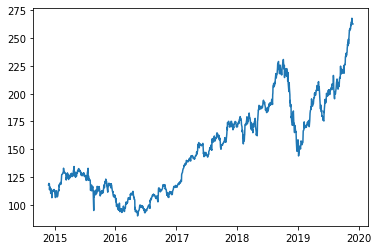

In [62]:
plt.plot(df.index, df.open)

In [83]:
# coding: utf-8

# In[1]:

#bollinger bands is a simple indicator
#just moving average plus moving standard deviation
#but pattern recognition is a differenct case
#visualization is easy for human to identify the pattern
#but for the machines, we gotta find a different approach
#when we talk about pattern recognition these days
#people always respond with machine learning
#why machine learning when u can use arithmetic approach 
#which is much faster and simpler?

#there are many patterns for recognition
#top m, bottom w, head-shoulder top, head-shoulder bottom, elliott waves
#in this content, we only discuss bottom w
#top m is just the reverse of bottom w
#rules of bollinger bands and bottom w can be found in the following link:
# https://www.tradingview.com/wiki/Bollinger_Bands_(BB)

import os
import pandas as pd
import matplotlib.pyplot as plt
import copy
import numpy as np

# In[3]:

#first step is to calculate moving average and moving standard deviation
#we plus/minus two standard deviations on moving average
#we get our upper, mid, lower bands
def bollinger_bands(df):
    
    data=copy.deepcopy(df)
    data['std']=data['price'].rolling(window=20,min_periods=20).std()
    data['mid band']=data['price'].rolling(window=20,min_periods=20).mean()
    data['upper band']=data['mid band']+2*data['std']
    data['lower band']=data['mid band']-2*data['std']
    
    return data


# In[4]:


#the signal generation is a bit tricky
#there are four conditions to satisfy
#for the shape of w, there are five nodes
#from left to right, top to bottom, l,k,j,m,i
#when we generate signals
#the iteration node is the top right node i, condition 4
#first, we find the middle node j, condition 2
#next, we identify the first bottom node k, condition 1
#after that, we point out the first top node l
#l is not any of those four conditions
#we just use it for pattern visualization
#finally, we locate the second bottom node m, condition 3
#plz refer to the following link for my poor visualization
# https://github.com/je-suis-tm/quant-trading/blob/master/preview/bollinger%20bands%20bottom%20w%20pattern.png
def signal_generation(data,method):
    
    #according to investopedia
    #for a double bottom pattern
    #we should use 3-month horizon which is 75
    period=75
    
    #alpha denotes the difference between price and bollinger bands
    #if alpha is too small, its unlikely to trigger a signal
    #if alpha is too large, its too easy to trigger a signal
    #which gives us a higher probability to lose money
    #beta denotes the scale of bandwidth
    #when bandwidth is larger than beta, it is expansion period
    #when bandwidth is smaller than beta, it is contraction period
    alpha=10
    beta=10
    
    df=method(data)
    df['signals']=0
    
    #as usual, cumsum denotes the holding position
    #coordinates store five nodes of w shape
    #later we would use these coordinates to draw a w shape
    df['cumsum']=0
    df['coordinates']=''
    
    for i in range(period,len(df)):
        
        #moveon is a process control
        #if moveon==true, we move on to verify the next condition
        #if false, we move on to the next iteration
        #threshold denotes the value of node k
        #we would use it for the comparison with node m
        #plz refer to condition 3
        moveon=False
        threshold=0.0
        
        #bottom w pattern recognition
        #there is another signal generation method called walking the bands
        #i personally think its too late for following the trend
        #after confirmation of several breakthroughs
        #maybe its good for stop and reverse
        #condition 4
        if (df['price'][i]>df['upper band'][i]) and \
        (df['cumsum'][i]==0):
            
            for j in range(i,i-period,-1):                
                
                #condition 2
                if (np.abs(df['mid band'][j]-df['price'][j])<alpha) and \
                (np.abs(df['mid band'][j]-df['upper band'][i])<alpha):
                    moveon=True
                    break
            
            if moveon==True:
                moveon=False
                for k in range(j,i-period,-1):
                    
                    #condition 1
                    if (np.abs(df['lower band'][k]-df['price'][k])<alpha):
                        threshold=df['price'][k]
                        moveon=True
                        break
                        
            if moveon==True:
                moveon=False
                for l in range(k,i-period,-1):
                    
                    #this one is for plotting w shape
                    if (df['mid band'][l]<df['price'][l]):
                        moveon=True
                        break
                    
            if moveon==True:
                moveon=False        
                for m in range(i,j,-1):
                    
                    #condition 3
                    if (df['price'][m]-df['lower band'][m]<alpha) and \
                    (df['price'][m]>df['lower band'][m]) and \
                    (df['price'][m]<threshold):
                        df.at[i,'signals']=1
                        df.at[i,'coordinates']='%s,%s,%s,%s,%s'%(l,k,j,m,i)
                        df['cumsum']=df['signals'].cumsum()
                        moveon=True
                        break
        
        #clear our positions when there is contraction on bollinger bands
        #contraction on the bandwidth is easy to understand
        #when price momentum exists, the price would move dramatically for either direction
        #which greatly increases the standard deviation
        #when the momentum vanishes, we clear our positions
        
        #note that we put moveon in the condition
        #just in case our signal generation time is contraction period
        #but we dont wanna clear positions right now
        if (df['cumsum'][i]!=0) and \
        (df['std'][i]<beta) and \
        (moveon==False):
            df.at[i,'signals']=-1
            df['cumsum']=df['signals'].cumsum()
            
    return df


# In[5]:

#visualization
def plot(new):
    
    #as usual we could cut the dataframe into a small slice
    #for a tight and neat figure
    #a and b denotes entry and exit of a trade
    a,b=list(new[new['signals']!=0].iloc[:2].index)
    
    newbie=new[a-85:b+30]
    newbie.set_index(pd.to_datetime(newbie['date'],format='%Y-%m-%d %H:%M:%S'),inplace=True)

   
    fig=plt.figure(figsize=(10,5))
    ax=fig.add_subplot(111)
    
    #plotting positions on price series and bollinger bands
    ax.plot(newbie['price'],label='price')
    ax.fill_between(newbie.index,newbie['lower band'],newbie['upper band'],alpha=0.2,color='#45ADA8')
    ax.plot(newbie['mid band'],linestyle='--',label='moving average',c='#132226')
    ax.plot(newbie['price'][newbie['signals']==1],marker='^',markersize=12, \
            lw=0,c='g',label='LONG')
    ax.plot(newbie['price'][newbie['signals']==-1],marker='v',markersize=12, \
            lw=0,c='r',label='SHORT')
    
    #plotting w shape
    #we locate the coordinates then find the exact date as index
    temp=newbie['coordinates'][newbie['signals']==1]
    indexlist=list(map(int,temp[temp.index[0]].split(',')))
    ax.plot(newbie['price'][pd.to_datetime(new['date'].iloc[indexlist])], \
            lw=5,alpha=0.7,c='#FE4365',label='double bottom pattern')
    
    #add some captions
    plt.text((newbie.loc[newbie['signals']==1].index[0]), \
             newbie['lower band'][newbie['signals']==1],'Expansion',fontsize=15,color='#563838')
    plt.text((newbie.loc[newbie['signals']==-1].index[0]), \
             newbie['lower band'][newbie['signals']==-1],'Contraction',fontsize=15,color='#563838')
    
    plt.legend(loc='best')
    plt.title('Bollinger Bands Pattern Recognition')
    plt.ylabel('price')
    plt.grid(True)
    plt.show()


# In[6]:

#ta-da
def main():
    
    #again, i download data from histdata.com
    #and i take the average of bid and ask price
    df=pd.read_csv('gbpusd.csv')
    
    signals=signal_generation(df,bollinger_bands)

    new=copy.deepcopy(signals)
    plot(new)

#how to calculate stats could be found from my other code called Heikin-Ashi
# https://github.com/je-suis-tm/quant-trading/blob/master/heikin%20ashi%20backtest.py




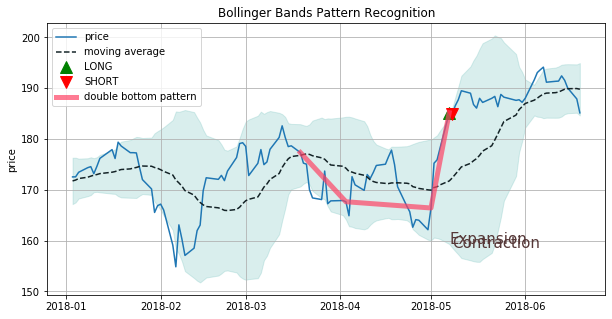

In [84]:
open_df = copy.deepcopy(df).reset_index()
open_df["price"] = open_df["open"]
open_signals = signal_generation(open_df[["date","price"]], bollinger_bands)
plot(open_signals)

In [82]:
open_signals[open_signals["signals"] > 0]

,date,price,std,mid band,upper band,lower band,signals,cumsum,coordinates
160,2015-07-20,130.97,2.016698,126.4375,130.470897,122.404103,1,1,"130,132,134,152,160"


In [78]:
open_df.reset_index()

,date,change,changeOverTime,changePercent,close,high,label,low,open,symbol,uClose,uHigh,uLow,uOpen,uVolume,volume,price
0,2014-11-26,0.00,0.000000,0.0000,119.00,119.10,"Nov 26, 14",117.83,117.94,AAPL,119.00,119.10,117.83,117.94,40831886,40831886,117.94
1,2014-11-28,-0.07,-0.000588,-0.0588,118.93,119.40,"Nov 28, 14",118.05,119.27,AAPL,118.93,119.40,118.05,119.27,24814402,24814402,119.27
2,2014-12-01,-3.86,-0.033025,-3.2456,115.07,119.25,"Dec 1, 14",111.27,118.81,AAPL,115.07,119.25,111.27,118.81,83814037,83814037,118.81
3,2014-12-02,-0.44,-0.036723,-0.3824,114.63,115.75,"Dec 2, 14",112.75,113.50,AAPL,114.63,115.75,112.75,113.50,59348940,59348940,113.50
4,2014-12-03,1.30,-0.025798,1.1341,115.93,116.35,"Dec 3, 14",115.11,115.75,AAPL,115.93,116.35,115.11,115.75,43063440,43063440,115.75
5,2014-12-04,-0.44,-0.029496,-0.3795,115.49,117.20,"Dec 4, 14",115.29,115.77,AAPL,115.49,117.20,115.29,115.77,42155776,42155776,115.77
6,2014-12-05,-0.49,-0.033613,-0.4243,115.00,116.08,"Dec 5, 14",114.64,115.99,AAPL,115.00,116.08,114.64,115.99,38318895,38318895,115.99
7,2014-12-08,-2.60,-0.055462,-2.2609,112.40,114.65,"Dec 8, 14",111.62,114.10,AAPL,112.40,114.65,111.62,114.10,57664850,57664850,114.10
8,2014-12-09,1.72,-0.041008,1.5302,114.12,114.30,"Dec 9, 14",109.35,110.19,AAPL,114.12,114.30,109.35,110.19,60208036,60208036,110.19
9,2014-12-10,-2.17,-0.059244,-1.9015,111.95,114.85,"Dec 10, 14",111.54,114.41,AAPL,111.95,114.85,111.54,114.41,44565318,44565318,114.41
